## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
# import os
import keras
# import itertools
# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.regularizers import l1, l2, l1_l2

In [7]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drop_ratio=0.2, reg_func=l1, reg_ratio=1e-2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units = n_units, activation = "relu", name = "hidden_layer"+str(i+1), 
                                   kernel_regularizer = reg_func(reg_ratio))(input_layer)
            x = Dropout(drop_ratio)(x)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units = n_units, activation = "relu", name = "hidden_layer"+str(i+1),
                                   kernel_regularizer = reg_func(reg_ratio))(x)
            x = Dropout(drop_ratio)(x)
            x = BatchNormalization()(x)
        
        out = keras.layers.Dense(units = output_units, activation = "softmax", name = "output_layer")(x)
        
        model = keras.models.Model(inputs = [input_layer], outputs = [out])
        
    return model

In [8]:
"""Code Here
設定超參數
"""
Learning_rate = [1e-2, 1e-3]
Epochs = 50
Batch_size = [64, 256]
Reg_func = [l1, l2]
Momentum = 0.95

In [11]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for i, LR in enumerate(Learning_rate):
    for j, BS in enumerate(Batch_size):
        for k, RF in enumerate(Reg_func):
            keras.backend.clear_session()
            model = build_mlp(input_shape=x_train.shape[1:], reg_func=RF)
            model.summary()
            optimizer = keras.optimizers.SGD(lr = LR, nesterov=True, momentum = Momentum)
            model.compile(loss= "categorical_crossentropy", metrics = ["accuracy"], optimizer=optimizer)
            model.fit(x_train, y_train, epochs = Epochs, batch_size = BS, validation_data = (x_test, y_test), shuffle = True)
            
            # Collect results
            train_loss = model.history.history["loss"]
            valid_loss = model.history.history["val_loss"]
            train_acc = model.history.history["accuracy"]
            valid_acc = model.history.history["val_accuracy"]
            
            exp_name_tag = "exp-LR_%s-BS_%s-RF_%s" %(str(LR), str(BS), str(RF))
            results[exp_name_tag] = {"train_loss": train_loss,
                                     "valid_loss": valid_loss,
                                     "train_acc": train_acc,
                                     "valid_acc": valid_acc}

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)              

782/782 [==============================] - 10s 12ms/step - loss: 3.9061 - accuracy: 0.0999 - val_loss: 3.9053 - val_accuracy: 0.1000
Epoch 46/50
782/782 [==============================] - 10s 12ms/step - loss: 3.9061 - accuracy: 0.0998 - val_loss: 3.9065 - val_accuracy: 0.1000
Epoch 47/50
782/782 [==============================] - 10s 13ms/step - loss: 3.9062 - accuracy: 0.1012 - val_loss: 3.9055 - val_accuracy: 0.1000
Epoch 48/50
782/782 [==============================] - 10s 13ms/step - loss: 3.9062 - accuracy: 0.0985 - val_loss: 3.9071 - val_accuracy: 0.1000
Epoch 49/50
782/782 [==============================] - 10s 12ms/step - loss: 3.9062 - accuracy: 0.0964 - val_loss: 3.9065 - val_accuracy: 0.1000
Epoch 50/50
782/782 [==============================] - 10s 13ms/step - loss: 3.9060 - accuracy: 0.0992 - val_loss: 3.9052 - val_accuracy: 0.1000
Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape             

782/782 [==============================] - 10s 12ms/step - loss: 2.1194 - accuracy: 0.2077 - val_loss: 2.1881 - val_accuracy: 0.1882
Epoch 40/50
782/782 [==============================] - 9s 12ms/step - loss: 2.2222 - accuracy: 0.1951 - val_loss: 2.2863 - val_accuracy: 0.1636
Epoch 41/50
782/782 [==============================] - 9s 12ms/step - loss: 2.1310 - accuracy: 0.1974 - val_loss: 2.0934 - val_accuracy: 0.2230
Epoch 42/50
782/782 [==============================] - 9s 12ms/step - loss: 2.1317 - accuracy: 0.1975 - val_loss: 2.2579 - val_accuracy: 0.1503
Epoch 43/50
782/782 [==============================] - 9s 12ms/step - loss: 2.1303 - accuracy: 0.1963 - val_loss: 2.1666 - val_accuracy: 0.1960
Epoch 44/50
782/782 [==============================] - 9s 11ms/step - loss: 2.1169 - accuracy: 0.2020 - val_loss: 2.1580 - val_accuracy: 0.1746
Epoch 45/50
782/782 [==============================] - 9s 11ms/step - loss: 2.1244 - accuracy: 0.2011 - val_loss: 2.0902 - val_accuracy: 0.2150
Epo

196/196 [==============================] - 4s 19ms/step - loss: 3.9004 - accuracy: 0.1577 - val_loss: 4.0184 - val_accuracy: 0.1000
Epoch 34/50
196/196 [==============================] - 4s 19ms/step - loss: 3.8734 - accuracy: 0.1579 - val_loss: 3.9977 - val_accuracy: 0.1081
Epoch 35/50
196/196 [==============================] - 4s 19ms/step - loss: 3.8743 - accuracy: 0.1557 - val_loss: 3.8262 - val_accuracy: 0.1806
Epoch 36/50
196/196 [==============================] - 4s 19ms/step - loss: 3.8853 - accuracy: 0.1560 - val_loss: 4.0347 - val_accuracy: 0.1000
Epoch 37/50
196/196 [==============================] - 4s 19ms/step - loss: 3.8803 - accuracy: 0.1560 - val_loss: 4.0360 - val_accuracy: 0.0985
Epoch 38/50
196/196 [==============================] - 4s 19ms/step - loss: 3.8793 - accuracy: 0.1561 - val_loss: 3.9075 - val_accuracy: 0.1442
Epoch 39/50
196/196 [==============================] - 4s 19ms/step - loss: 3.8745 - accuracy: 0.1555 - val_loss: 4.0787 - val_accuracy: 0.1000
Epoc

196/196 [==============================] - 4s 19ms/step - loss: 1.8627 - accuracy: 0.3687 - val_loss: 1.9852 - val_accuracy: 0.3206
Epoch 28/50
196/196 [==============================] - 4s 19ms/step - loss: 1.8565 - accuracy: 0.3696 - val_loss: 1.7786 - val_accuracy: 0.4052
Epoch 29/50
196/196 [==============================] - 4s 19ms/step - loss: 1.8837 - accuracy: 0.3611 - val_loss: 1.8681 - val_accuracy: 0.3640
Epoch 30/50
196/196 [==============================] - 4s 20ms/step - loss: 1.8665 - accuracy: 0.3662 - val_loss: 1.8895 - val_accuracy: 0.3577
Epoch 31/50
196/196 [==============================] - 4s 19ms/step - loss: 1.8836 - accuracy: 0.3590 - val_loss: 1.9457 - val_accuracy: 0.3229
Epoch 32/50
196/196 [==============================] - 4s 19ms/step - loss: 1.8718 - accuracy: 0.3622 - val_loss: 1.8925 - val_accuracy: 0.3655
Epoch 33/50
196/196 [==============================] - 4s 19ms/step - loss: 1.8658 - accuracy: 0.3640 - val_loss: 1.9423 - val_accuracy: 0.3300
Epoc

782/782 [==============================] - 9s 12ms/step - loss: 2.4221 - accuracy: 0.1584 - val_loss: 2.3542 - val_accuracy: 0.1856
Epoch 22/50
782/782 [==============================] - 9s 12ms/step - loss: 2.4137 - accuracy: 0.1577 - val_loss: 2.5082 - val_accuracy: 0.1200
Epoch 23/50
782/782 [==============================] - 10s 12ms/step - loss: 2.4191 - accuracy: 0.1591 - val_loss: 2.5760 - val_accuracy: 0.1005
Epoch 24/50
782/782 [==============================] - 10s 13ms/step - loss: 2.4093 - accuracy: 0.1589 - val_loss: 2.3870 - val_accuracy: 0.1603
Epoch 25/50
782/782 [==============================] - 10s 13ms/step - loss: 2.4765 - accuracy: 0.1551 - val_loss: 2.4348 - val_accuracy: 0.1584
Epoch 26/50
782/782 [==============================] - 10s 12ms/step - loss: 2.4443 - accuracy: 0.1484 - val_loss: 2.3640 - val_accuracy: 0.1799
Epoch 27/50
782/782 [==============================] - 9s 12ms/step - loss: 2.4362 - accuracy: 0.1460 - val_loss: 2.3707 - val_accuracy: 0.1817


782/782 [==============================] - 9s 12ms/step - loss: 1.8257 - accuracy: 0.3720 - val_loss: 1.7589 - val_accuracy: 0.3932
Epoch 16/50
782/782 [==============================] - 9s 12ms/step - loss: 1.8340 - accuracy: 0.3706 - val_loss: 1.8052 - val_accuracy: 0.3742
Epoch 17/50
782/782 [==============================] - 9s 12ms/step - loss: 1.8261 - accuracy: 0.3749 - val_loss: 2.0883 - val_accuracy: 0.2823
Epoch 18/50
782/782 [==============================] - 10s 12ms/step - loss: 1.8419 - accuracy: 0.3678 - val_loss: 1.8375 - val_accuracy: 0.3722
Epoch 19/50
782/782 [==============================] - 9s 12ms/step - loss: 1.8333 - accuracy: 0.3725 - val_loss: 1.9470 - val_accuracy: 0.3255
Epoch 20/50
782/782 [==============================] - 9s 11ms/step - loss: 1.8468 - accuracy: 0.3649 - val_loss: 1.8053 - val_accuracy: 0.3847
Epoch 21/50
782/782 [==============================] - 9s 12ms/step - loss: 1.8279 - accuracy: 0.3692 - val_loss: 1.8721 - val_accuracy: 0.3621
Epo

196/196 [==============================] - 4s 20ms/step - loss: 2.3786 - accuracy: 0.2515 - val_loss: 3.4074 - val_accuracy: 0.1066
Epoch 10/50
196/196 [==============================] - 4s 20ms/step - loss: 2.3674 - accuracy: 0.2646 - val_loss: 3.1690 - val_accuracy: 0.1483
Epoch 11/50
196/196 [==============================] - 4s 22ms/step - loss: 2.3609 - accuracy: 0.2673 - val_loss: 2.4369 - val_accuracy: 0.2488
Epoch 12/50
196/196 [==============================] - 4s 21ms/step - loss: 2.3766 - accuracy: 0.2553 - val_loss: 2.4777 - val_accuracy: 0.2006
Epoch 13/50
196/196 [==============================] - 4s 20ms/step - loss: 2.3659 - accuracy: 0.2570 - val_loss: 2.3652 - val_accuracy: 0.2625
Epoch 14/50
196/196 [==============================] - 4s 20ms/step - loss: 2.3662 - accuracy: 0.2611 - val_loss: 2.8248 - val_accuracy: 0.1520
Epoch 15/50
196/196 [==============================] - 4s 20ms/step - loss: 2.3856 - accuracy: 0.2445 - val_loss: 2.4356 - val_accuracy: 0.2033
Epoc

196/196 [==============================] - 4s 21ms/step - loss: 11.3449 - accuracy: 0.3643 - val_loss: 10.4805 - val_accuracy: 0.4120
Epoch 4/50
196/196 [==============================] - 4s 21ms/step - loss: 9.8939 - accuracy: 0.3876 - val_loss: 9.1756 - val_accuracy: 0.4210
Epoch 5/50
196/196 [==============================] - 4s 21ms/step - loss: 8.6682 - accuracy: 0.3989 - val_loss: 8.0871 - val_accuracy: 0.4210
Epoch 6/50
196/196 [==============================] - 4s 20ms/step - loss: 7.6235 - accuracy: 0.4099 - val_loss: 7.1065 - val_accuracy: 0.4307
Epoch 7/50
196/196 [==============================] - 4s 21ms/step - loss: 6.7344 - accuracy: 0.4196 - val_loss: 6.3086 - val_accuracy: 0.4345
Epoch 8/50
196/196 [==============================] - 4s 20ms/step - loss: 5.9784 - accuracy: 0.4268 - val_loss: 5.6222 - val_accuracy: 0.4342
Epoch 9/50
196/196 [==============================] - 4s 20ms/step - loss: 5.3524 - accuracy: 0.4272 - val_loss: 5.0813 - val_accuracy: 0.4191
Epoch 10

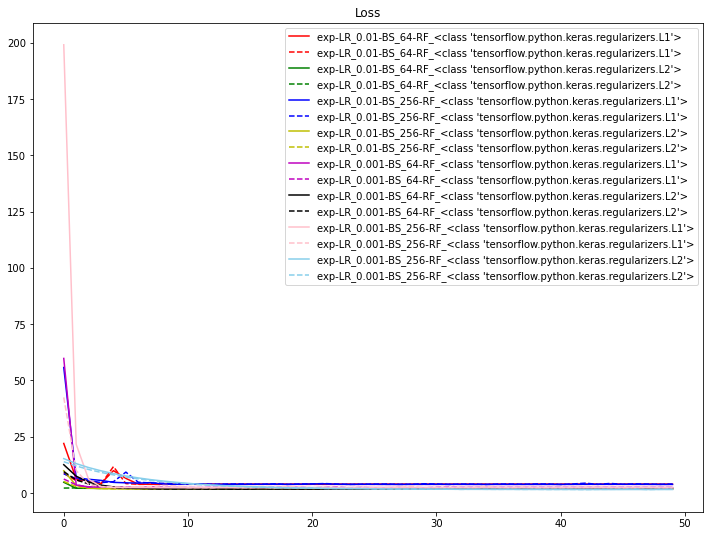

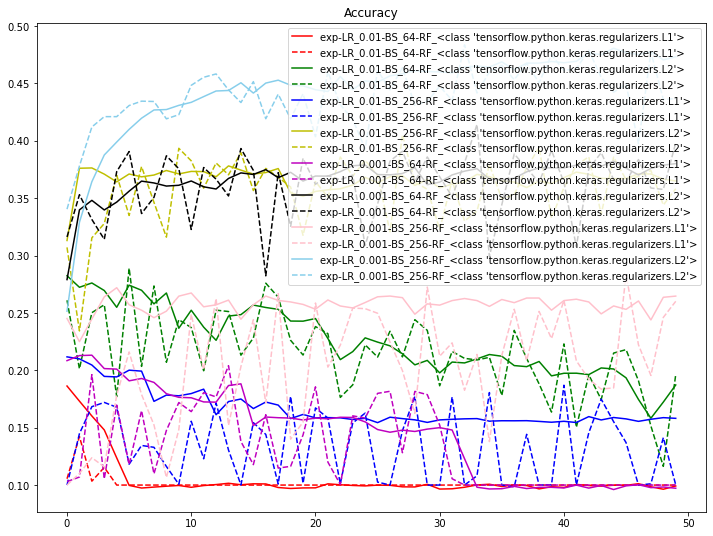

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k", "pink", "skyblue"]

plt.figure(figsize = (12, 9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train_loss"])), results[cond]["train_loss"], "-", label = cond, c = color_bar[i])
    plt.plot(range(len(results[cond]["valid_loss"])), results[cond]["valid_loss"], "--", label = cond, c = color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize = (12, 9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train_acc"])), results[cond]["train_acc"], "-", label = cond, c = color_bar[i])
    plt.plot(range(len(results[cond]["valid_acc"])), results[cond]["valid_acc"], "--", label = cond, c = color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()